In [94]:
import pandas as pd 
df = pd.read_csv(r'C:\Users\Ali Muhtasham Javed\Downloads\weekly-covid-deaths-per-million-people.csv')
df



,Entity,Code,Day,Weekly deaths per million people
0,Afghanistan,AFG,2020-01-09,0.0
1,Afghanistan,AFG,2020-01-10,0.0
2,Afghanistan,AFG,2020-01-11,0.0
3,Afghanistan,AFG,2020-01-12,0.0
4,Afghanistan,AFG,2020-01-13,0.0
...,...,...,...,...
492102,Zimbabwe,ZWE,2025-06-11,0.0
492103,Zimbabwe,ZWE,2025-06-12,0.0
492104,Zimbabwe,ZWE,2025-06-13,0.0
492105,Zimbabwe,ZWE,2025-06-14,0.0


In [95]:
df.drop(columns=['Code'], inplace=True, errors='ignore')
# If you want to create a new column 'DPW' as a copy of 'Weekly deaths per million people':
df['DPW'] = df['Weekly deaths per million people']

In [96]:
df.dropna(inplace = True)

In [97]:
if 'DPW' in df.columns:
    df = df.dropna(subset=['DPW'])
    df = df[df['DPW'] != 0.0]
df

,Entity,Day,Weekly deaths per million people,DPW
76,Afghanistan,2020-03-25,0.024643,0.024643
77,Afghanistan,2020-03-26,0.024643,0.024643
78,Afghanistan,2020-03-27,0.024643,0.024643
79,Afghanistan,2020-03-28,0.049287,0.049287
80,Afghanistan,2020-03-29,0.049287,0.049287
...,...,...,...,...
491633,Zimbabwe,2024-02-28,0.062232,0.062232
491634,Zimbabwe,2024-02-29,0.062232,0.062232
491635,Zimbabwe,2024-03-01,0.062232,0.062232
491636,Zimbabwe,2024-03-02,0.062232,0.062232


In [98]:
df['Day'] = pd.to_datetime(df['Day'])
df['Week'] = df['Day'].dt.to_period('W').apply(lambda r:r.start_time)
df

,Entity,Day,Weekly deaths per million people,DPW,Week
76,Afghanistan,2020-03-25,0.024643,0.024643,2020-03-23
77,Afghanistan,2020-03-26,0.024643,0.024643,2020-03-23
78,Afghanistan,2020-03-27,0.024643,0.024643,2020-03-23
79,Afghanistan,2020-03-28,0.049287,0.049287,2020-03-23
80,Afghanistan,2020-03-29,0.049287,0.049287,2020-03-23
...,...,...,...,...,...
491633,Zimbabwe,2024-02-28,0.062232,0.062232,2024-02-26
491634,Zimbabwe,2024-02-29,0.062232,0.062232,2024-02-26
491635,Zimbabwe,2024-03-01,0.062232,0.062232,2024-02-26
491636,Zimbabwe,2024-03-02,0.062232,0.062232,2024-02-26


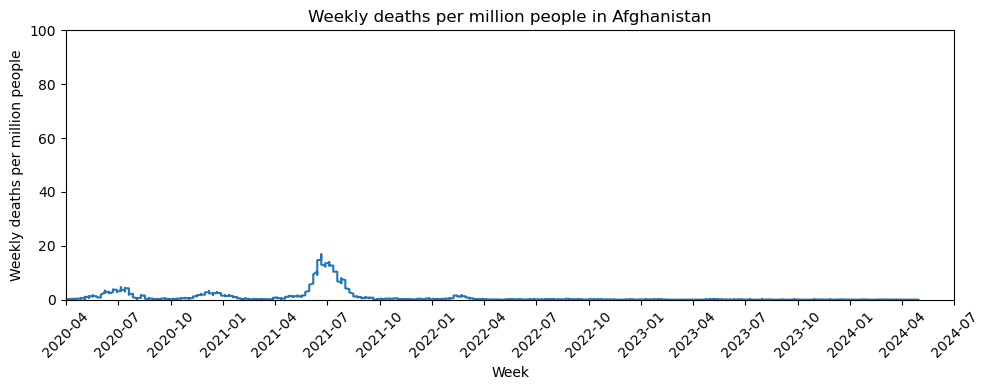

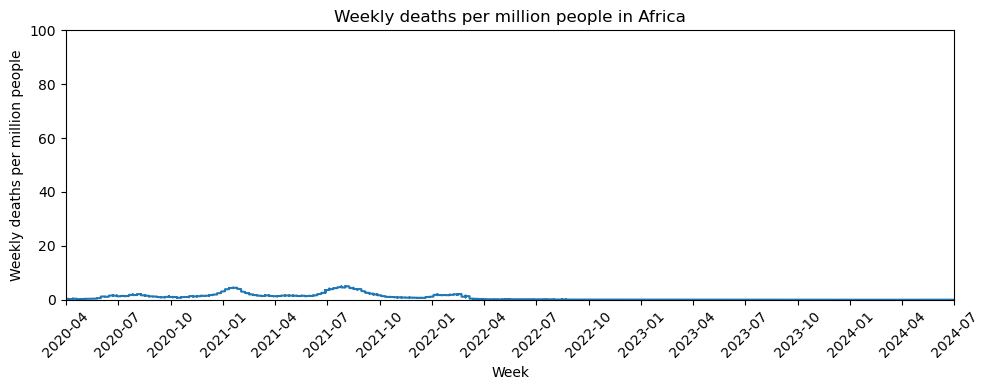

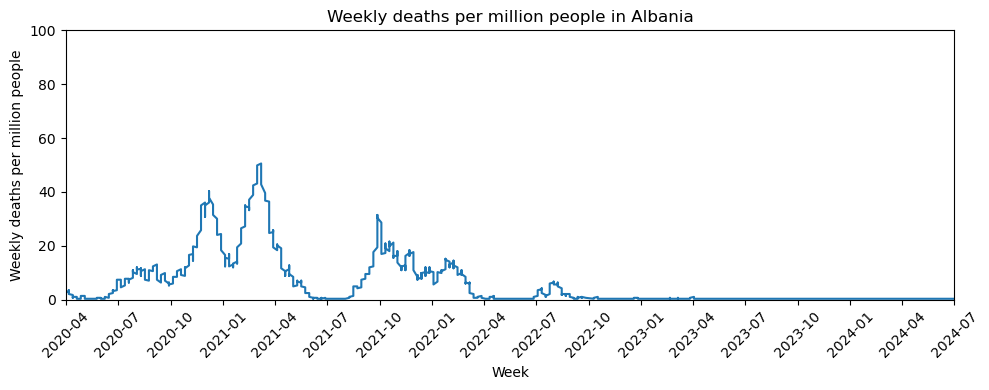

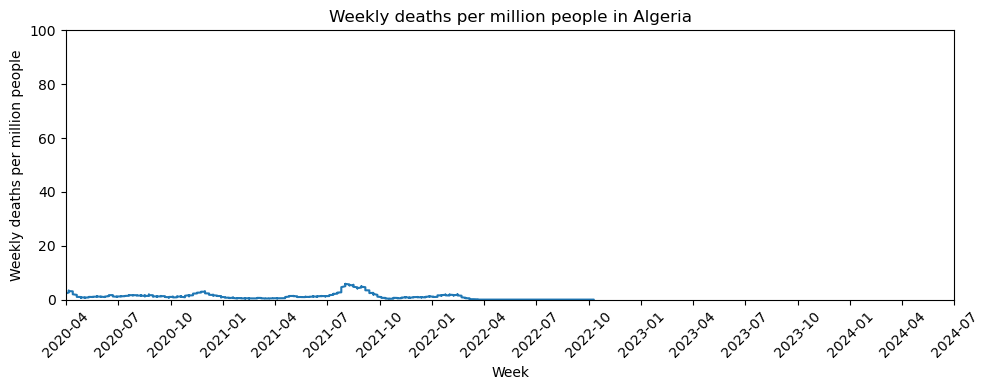

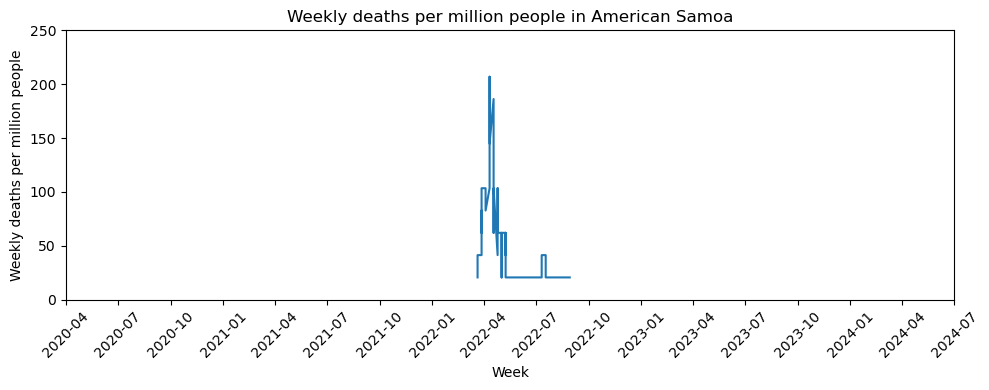

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime 

for i, Entity in enumerate(df['Entity'].unique()):
    if i >= 5:  #to analyzye first 5 countires first 
        break
    country_data = df[df['Entity'] == Entity] 
    plt.figure(figsize = (10,4))
    plt.plot(country_data['Week'], country_data['DPW'])
    plt.title(f"Weekly deaths per million people in {Entity}")
    plt.xlabel('Week')
    plt.ylabel('Weekly deaths per million people')
    start_date = datetime.datetime(2020,4,1)
    end_date = datetime.datetime(2024,7,1)
    plt.xlim(start_date, end_date)
    if Entity == 'American Samoa':
        plt.ylim(0, 250)
    else:
        plt.ylim(0, 100)
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # every 3rd month
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
   


In [100]:
import requests

def get_population(country_name):
    try:
        response = requests.get(f"https://restcountries.com/v3.1/name/{country_name}")
        data = response.json()
        return data[0]['population']
    except Exception as e:
        print(f"❌ Failed: {country_name} – {e}")
        return None



In [101]:
country ='American Samoa'
country_df =df[df['Entity'] == country]


In [102]:
population = get_population(country)
if population: 
    deaths_per_million_sum = country_df['DPW'].sum() # sums a rate, not the count. so the the figure 
#that might comes out to be as the total death count is wrong. 
    estimated_deaths = (deaths_per_million_sum / 1000000) * population
    print(f"Estimated total COVID-19 deaths in {country}: {estimated_deaths:,.0f}")
else:
    print("⚠️ Population data not available for calculation.")

Estimated total COVID-19 deaths in American Samoa: 272


In [103]:
df[df['Entity'] == 'American Samoa']['DPW'].describe()

count     78.000000
mean      63.144780
std       49.905602
min       20.694508
25%       20.694508
50%       41.389015
75%       82.778030
max      206.945080
Name: DPW, dtype: float64

In [104]:
#checks number of rows
df[df['Entity'] == "American Samoa"].shape[0]

78

<Axes: title={'center': 'DPW in American Samoa'}, xlabel='Week'>

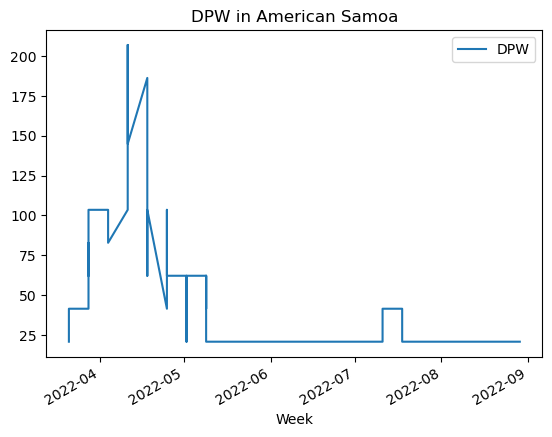

In [105]:
df[df['Entity'] == "American Samoa"].plot(x ='Week', y = 'DPW', title = "DPW in American Samoa")

In [106]:
df.columns

Index(['Entity', 'Day', 'Weekly deaths per million people', 'DPW', 'Week'], dtype='object')

In [ ]:
df.set_index('Day', inplace = True) 
#inplace true to actually not get the day back into the column afer the below line drops some other column.
df.drop(columns='Weekly deaths per million people')

,Entity,DPW,Week
Day,,,
2020-03-25,Afghanistan,0.024643,2020-03-23
2020-03-26,Afghanistan,0.024643,2020-03-23
2020-03-27,Afghanistan,0.024643,2020-03-23
2020-03-28,Afghanistan,0.049287,2020-03-23
2020-03-29,Afghanistan,0.049287,2020-03-23
...,...,...,...
2024-02-28,Zimbabwe,0.062232,2024-02-26
2024-02-29,Zimbabwe,0.062232,2024-02-26
2024-03-01,Zimbabwe,0.062232,2024-02-26


In [119]:
weekly_global_average = df.groupby('Week')['DPW'].mean().reset_index()
print(weekly_global_average)

          Week       DPW
0   2020-01-06  0.005472
1   2020-01-13  0.000497
2   2020-01-20  0.007731
3   2020-01-27  0.024922
4   2020-02-03  0.049980
..         ...       ...
279 2025-05-12  0.227769
280 2025-05-19  0.191737
281 2025-05-26  0.410229
282 2025-06-02  0.309844
283 2025-06-09  0.339446

[284 rows x 2 columns]


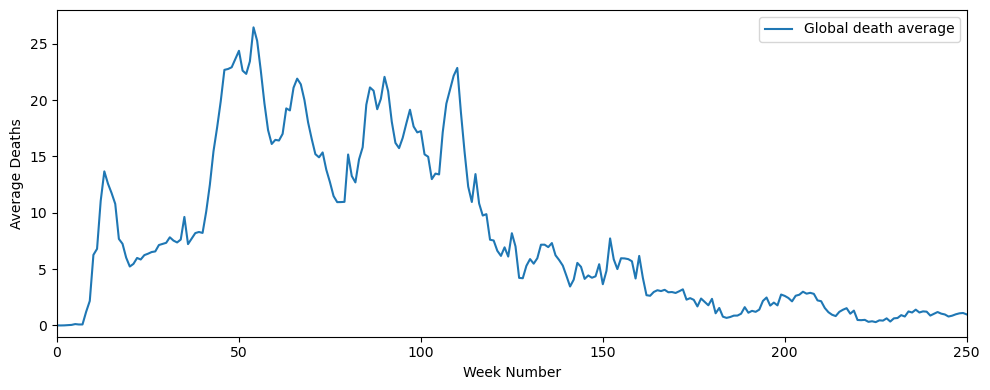

In [128]:
plt.figure(figsize=(10,4))
plt.plot(weekly_global_average.index, weekly_global_average['DPW'], label='Global death average')
plt.xlabel('Week Number')
plt.xlim(0,250)
plt.ylim(-1,28)
plt.ylabel('Average Deaths')
plt.xlim(0, min(250, len(weekly_global_average)-1))
plt.tight_layout()
plt.legend()
plt.show()

In [1]:
selected_countries = ['Pakistan', 'India', 'China']
plt.figure(figsize =(12,5))
for country in selected_countries:
    country_data = df[df['Entity'] == country]
    weekly_avg = country_data.groupby('Week')['DPW'].mean().reset_index()
    weekly_avg['Week'] = range(1, len(weekly_avg) + 1)
    plt.plot(weekly_avg['Week'], weekly_avg['DPW'], label=country)
plt.xlabel('Number of Weeks')
plt.xlim(0,270)
plt.xticks(ticks=range(0, 250, 25))
plt.yticks(ticks=range(0, 50, 5))
plt.ylabel('Average deaths')
plt.tight_layout()
plt.legend()
plt.show()    

NameError: name 'plt' is not defined

### ❌ Why It Doesn't Work
selected_countries is most likely:


selected_countries = ['India', 'Pakistan', 'Brazil']

#### This is a python list
##### You need to first filter the DataFrame to get the actual values (column) from the selected countries, and then call .describe():

In [ ]:
df[df['Entity'].isin(selected_countries)]['DPW'].describe()

count    4278.000000
mean        0.959134
std         2.661071
min         0.000702
25%         0.006314
50%         0.084543
75%         0.897601
max        33.545246
Name: DPW, dtype: float64